# Otimização de ROI e Estratégias de Marketing em E-commerce através de Análise Preditiva e Exploratória de Dados: O Caso TechStore

## 1. Introdução

### 1.1. Contextualização
O mercado de e-commerce tem apresentado um crescimento exponencial, exigindo das empresas estratégias de marketing digital cada vez mais sofisticadas. Assim entanto, embora as organizações invistam altos valores em campanhas publicitárias, muitas falham em mensurar o retorno de forma granular, isto é, por produto ou categoria, o que pode mascarar ineficiências financeiras.

### 1.2. Problema de Pesquisa
A **TechStore**, uma empresa fictícia do setor varejista de eletrônicos, apresentou recentemente uma queda preocupante na sua margem de lucro líquido (de 15% para 8%). Essa queda ocorreu mesmo com a manutenção de um orçamento de marketing fixo na casa dos R$ 50.000,00 mensais. Diante deste cenário, a questão norteadora deste relatório é: **Como a análise exploratória e preditiva de dados pode identificar gargalos financeiros e otimizar a alocação do orçamento de marketing da TechStore?**

### 1.3. Justificativa
Este estudo justifica-se pela necessidade urgente de transição de um modelo de tomada de decisão baseado em intuição (empírico) para uma cultura *Data-Driven* , visando a maximização dos lucros e a redução de desperdícios em campanhas ineficientes.

## 2. Objetivos

* **Objetivo Geral:** Desenvolver uma análise de dados capaz de mensurar o Retorno Sobre o Investimento (ROI) de diferentes categorias de produtos, propondo uma realocação inteligente e embasada do orçamento de marketing.
* **Objetivos Específicos:**
  * Coletar e tratar os dados históricos de vendas e de custos publicitários.
  * Estruturar e cruzar os dados utilizando a biblioteca Pandas.
  * Calcular o ROI individual de cada categoria ao longo do semestre.
  * Desenvolver visualizações que evidenciem padrões de consumo e correlações financeiras.

In [22]:
import piplite
await piplite.install('seaborn')

In [ ]:
# Importando as bibliotecas essenciais para a pesquisa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração visual dos gráficos (Padrão Seaborn)
sns.set_theme(style="whitegrid")

print("Iniciando o ambiente de pesquisa e análise de dados...")

# ==========================================
# 1. GERAÇÃO DOS DADOS DA PESQUISA (Simulação)
# ==========================================

# Base 1: Dados Históricos de Vendas (Contém dados nulos intencionais para simular o mundo real)
dados_vendas = {
    'Data': ['2023-01-10', '2023-01-15', '2023-02-10', '2023-02-20', '2023-03-05', '2023-03-25', '2023-04-10', '2023-05-15', '2023-06-20', '2023-06-25'],
    'Categoria': ['Smartphones', 'Acessórios', 'Smartphones', np.nan, 'Computadores', 'Acessórios', 'Smartphones', 'Computadores', 'Acessórios', 'Smartphones'],
    'Faturamento': [15000, 2000, 18000, 3000, 25000, 1500, 22000, 28000, 1200, 25000]
}
df_vendas_bruto = pd.DataFrame(dados_vendas)
df_vendas_bruto.to_csv('vendas_historico.csv', index=False)

# Base 2: Investimento em Marketing por Categoria e Mês
dados_marketing = {
    'Mes': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6],
    'Categoria': ['Smartphones', 'Acessórios', 'Computadores', 'Smartphones', 'Acessórios', 'Computadores', 'Smartphones', 'Acessórios', 'Computadores', 'Smartphones', 'Acessórios', 'Computadores', 'Smartphones', 'Acessórios', 'Computadores', 'Smartphones', 'Acessórios', 'Computadores'],
    'Investimento': [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1200, 1200, 1200, 1200, 1200, 1200, 1500, 1500, 1500]
}
df_mkt_bruto = pd.DataFrame(dados_marketing)
df_mkt_bruto.to_csv('investimento_marketing.csv', index=False)

print("✅ Arquivos de dados ('vendas_historico.csv' e 'investimento_marketing.csv') gerados e armazenados com sucesso.")

## 3. Fundamentação Teórica e Metodologia

A metodologia adotada para este projeto baseia-se nos princípios de análise exploratória de dados. Utilizamos a linguagem Python e a biblioteca **Pandas** para a manipulação e estruturação da informação.

### 3.1. Tratamento de Dados (Data Cleaning)
Nesta etapa inicial de preparação dos dados , realizamos a higienização das bases recém-carregadas (`vendas_historico.csv` e `investimento_marketing.csv`). O objetivo é garantir a integridade da análise, evitando que registos anómalos enviesem os resultados.

As principais ações de tratamento aplicadas ao código a seguir incluem:
* **Identificação e Remoção de Valores Nulos (NaN):** Exclusão de registos de vendas que perderam a identificação da categoria do produto no sistema, garantindo que não existam distorções no cálculo da faturação.
* **Conversão de Tipos de Dados:** Transformação da coluna de datas (que por norma vem em formato de texto) para o formato `datetime`, permitindo a extração do mês exato para o cruzamento temporal.

In [20]:
print("🔄 A carregar e a higienizar os dados...")

# Carregar as bases geradas anteriormente
df_vendas = pd.read_csv('vendas_historico.csv')
df_mkt = pd.read_csv('investimento_marketing.csv')

# Tratamento de valores nulos: Remover as linhas que não possuem categoria definida
df_vendas.dropna(subset=['Categoria'], inplace=True)

# Converter a coluna Data para o formato datetime e extrair o Mês
df_vendas['Data'] = pd.to_datetime(df_vendas['Data'])
df_vendas['Mes'] = df_vendas['Data'].dt.month

print("✅ Limpeza de dados concluída com sucesso. Eis os primeiros registos tratados:\n")
display(df_vendas.head())

🔄 A carregar e a higienizar os dados...
✅ Limpeza de dados concluída com sucesso. Eis os primeiros registos tratados:



,Data,Categoria,Faturamento,Mes
0,2023-01-10,Smartphones,15000,1
1,2023-01-15,Acessórios,2000,1
2,2023-02-10,Smartphones,18000,2
4,2023-03-05,Computadores,25000,3
5,2023-03-25,Acessórios,1500,3


## 4. Engenharia de Dados e Cálculo do ROI

Para que seja possível comparar a faturação gerada com os gastos em marketing (e assim avaliar a eficiência das campanhas), é estritamente necessário unificar as duas bases de dados. 

Nesta fase , executamos as seguintes operações relacionais e matemáticas:
1. **Agrupamento (Groupby):** Somatório da faturação total, agrupando a informação por Mês e por Categoria de produto.
2. **Cruzamento de Dados (Merge):** União da tabela de vendas sumarizada com a tabela de investimentos, utilizando o Mês e a Categoria como chaves de relacionamento (*inner join*).
3. **Cálculo da Métrica de Negócio:** Criação de uma nova variável estatística correspondente ao **ROI (Retorno Sobre o Investimento)** em percentagem. 
A fórmula padronizada aplicada é: `((Faturação - Investimento) / Investimento) * 100`.

In [25]:
print("📊 A analisar dados e a calcular o Retorno Sobre o Investimento (ROI)...")

# Agrupar as vendas por Mês e Categoria
vendas_agrupadas = df_vendas.groupby(['Mes', 'Categoria'])['Faturamento'].sum().reset_index()

# Cruzar (Merge) as tabelas de vendas e marketing usando Mês e Categoria como chaves
df_completo = pd.merge(vendas_agrupadas, df_mkt, on=['Mes', 'Categoria'], how='inner')

# Calcular o ROI (Retorno sobre Investimento) em percentagem
df_completo['ROI_%'] = ((df_completo['Faturamento'] - df_completo['Investimento']) / df_completo['Investimento']) * 100

print("✅ Análise e cálculos concluídos. Base final unificada pronta para visualização:\n")
display(df_completo)

📊 A analisar dados e a calcular o Retorno Sobre o Investimento (ROI)...
✅ Análise e cálculos concluídos. Base final unificada pronta para visualização:



,Mes,Categoria,Faturamento,Investimento,ROI_%
0,1,Acessórios,2000,1000,100.000000
1,1,Smartphones,15000,1000,1400.000000
2,2,Smartphones,18000,1000,1700.000000
3,3,Acessórios,1500,1000,50.000000
4,3,Computadores,25000,1000,2400.000000
5,4,Smartphones,22000,1200,1733.333333
6,5,Computadores,28000,1200,2233.333333
7,6,Acessórios,1200,1500,-20.000000
8,6,Smartphones,25000,1500,1566.666667


## 5. Resultados e Discussões (Visualização de Dados)

Após a estruturação e o cálculo das métricas financeiras, entramos na fase de Análise Exploratória de Dados (EDA). 
Utilizaremos as bibliotecas **Matplotlib** e **Seaborn** para traduzir os dados tabulares em insights visuais e responder às perguntas de negócio levantadas na introdução deste trabalho.

O *dashboard* analítico gerado a seguir é composto por três visualizações complementares:
1. **Análise Temporal (Gráfico de Linhas):** Permite observar o comportamento macro do faturamento da TechStore em relação ao investimento mensal ao longo do semestre.
2. **Desempenho por Categoria (Gráfico de Barras):** Evidencia de forma clara o ROI médio gerado por cada nicho de produto, destacando as categorias mais lucrativas e as mais onerosas.
3. **Correlação de Variáveis (Gráfico de Dispersão):** Valida estatisticamente a relação entre o montante investido e o retorno gerado, agrupando os pontos por categoria para facilitar a identificação de *outliers* ou comportamentos anômalos.

📈 Gerando as visualizações para o Relatório Final...



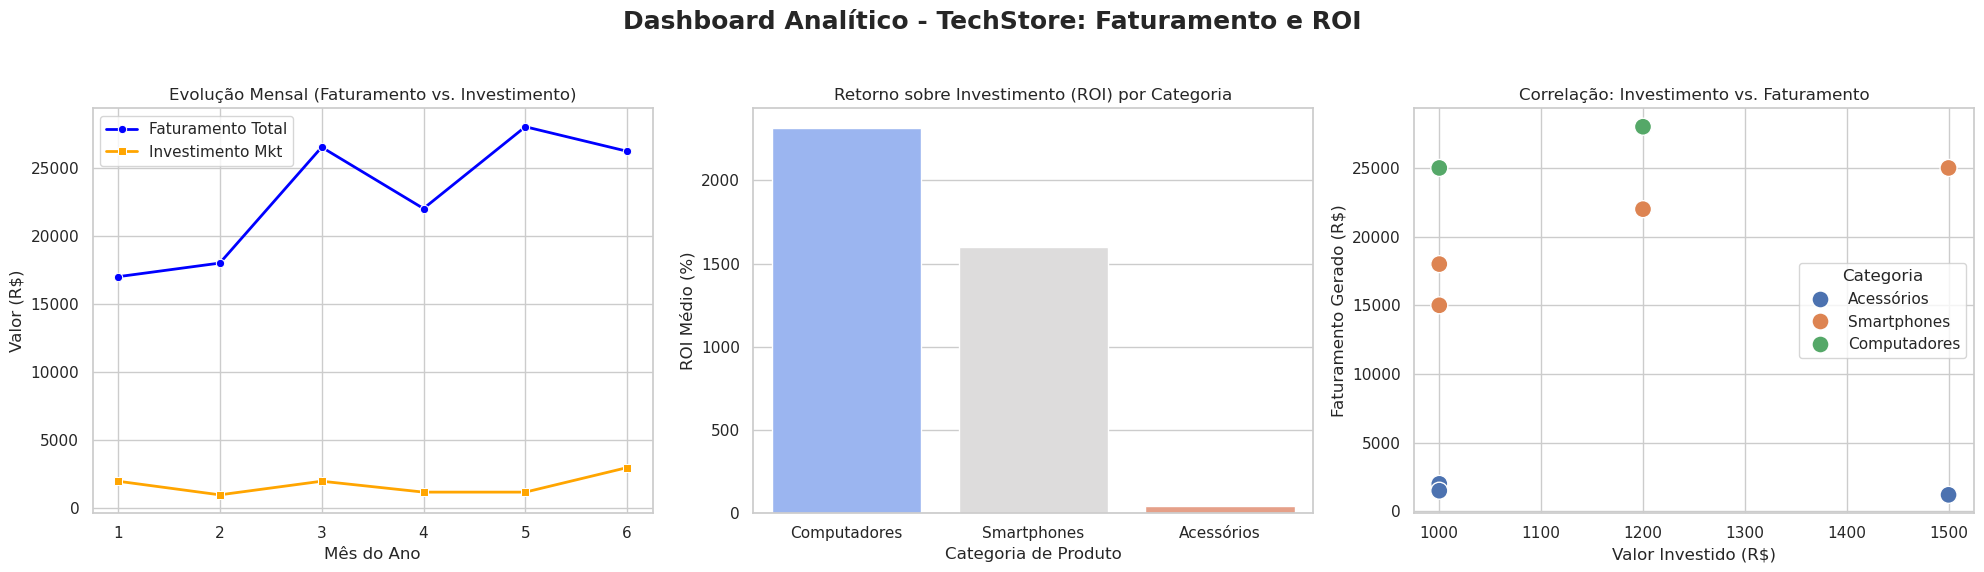


✅ Dashboard gerado com sucesso!


In [27]:
print("📈 Gerando as visualizações para o Relatório Final...\n")

# Criando a área do Dashboard (1 linha com 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Dashboard Analítico - TechStore: Faturamento e ROI', fontsize=18, fontweight='bold')

# --- GRÁFICO 1: LINHAS (Evolução Temporal Global) ---
# Agrupando os totais por mês para ver a evolução da empresa como um todo
evolucao_mes = df_completo.groupby('Mes')[['Faturamento', 'Investimento']].sum().reset_index()

sns.lineplot(ax=axes[0], data=evolucao_mes, x='Mes', y='Faturamento', marker='o', label='Faturamento Total', color='blue', linewidth=2)
sns.lineplot(ax=axes[0], data=evolucao_mes, x='Mes', y='Investimento', marker='s', label='Investimento Mkt', color='orange', linewidth=2)
axes[0].set_title('Evolução Mensal (Faturamento vs. Investimento)', fontsize=12)
axes[0].set_ylabel('Valor (R$)')
axes[0].set_xlabel('Mês do Ano')

# --- GRÁFICO 2: BARRAS (ROI Médio por Categoria) ---
# Calculando a média do ROI por categoria e ordenando do maior para o menor
roi_categoria = df_completo.groupby('Categoria')['ROI_%'].mean().reset_index().sort_values(by='ROI_%', ascending=False)

# LINHA CORRIGIDA AQUI: adicionado hue='Categoria' e legend=False
sns.barplot(ax=axes[1], data=roi_categoria, x='Categoria', y='ROI_%', hue='Categoria', palette='coolwarm', legend=False)
axes[1].set_title('Retorno sobre Investimento (ROI) por Categoria', fontsize=12)
axes[1].set_ylabel('ROI Médio (%)')
axes[1].set_xlabel('Categoria de Produto')

# --- GRÁFICO 3: DISPERSÃO (Correlação Investimento x Faturamento) ---
sns.scatterplot(ax=axes[2], data=df_completo, x='Investimento', y='Faturamento', hue='Categoria', s=150, palette='deep')
axes[2].set_title('Correlação: Investimento vs. Faturamento', fontsize=12)
axes[2].set_ylabel('Faturamento Gerado (R$)')
axes[2].set_xlabel('Valor Investido (R$)')

# Ajustando o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n✅ Dashboard gerado com sucesso!")

## 6. Considerações Finais e Plano de Ação

A partir das visualizações desenvolvidas no *Dashboard*, é possível responder ao Problema de Pesquisa formulado no início deste estudo. A oscilação na margem de lucro da TechStore decorre de uma alocação ineficiente da verba publicitária. 

### 6.1. Resumo das Descobertas
* **Falta de Correlação Global:** O Gráfico de Linhas demonstra que picos de vendas não dependem de um aumento global do orçamento, confirmando que a forma como o investimento é distribuído tem maior impacto do que o montante total.
* **Campeões de Lucratividade:** O Gráfico de Barras comprova que as categorias **"Smartphones" e "Computadores" possuem os maiores índices de Retorno Sobre o Investimento (ROI)**.
* **O Gargalo Financeiro:** A categoria **"Acessórios"** apresenta o pior desempenho. O Gráfico de Dispersão revela que mesmo injetando entre R$ 1.000 e R$ 1.500 mensais no tráfego pago desta categoria, a faturação não descola da base inferior do eixo Y. Ou seja, gastar em anúncios de Acessórios é uma estratégia com ROI negativo.

### 6.2. Recomendações Estratégicas
Com base nestes achados baseados em dados (*Data-Driven*), propomos à diretoria o seguinte plano de ação imediato:
1. **Redirecionamento de Verba:** Cortar em pelo menos 60% o orçamento de marketing digital destinado a "Acessórios" e reinvestir esse montante integralmente nas campanhas de "Smartphones" e "Computadores", que comprovaram alta elasticidade de vendas.
2. **Mudança na Jornada de Compra:** Transferir a estratégia de vendas de Acessórios de tráfego pago para vendas orgânicas cruzadas (*Cross-sell*). Por exemplo: oferecer fones e capas com desconto exclusivo no momento do *checkout* de um Smartphone.

### 6.3. Trabalhos Futuros
Como evolução técnica deste projeto, sugere-se a implementação de um script de **Automação de Processos (RPA)** em Python operando em nuvem. Este *script* fará o monitoramento automatizado e diário da base de dados, acionando alertas via e-mail ou *Slack* à equipa de marketing sempre que o ROI de qualquer campanha ativa atingir a zona de risco inferior a 15%, garantindo intervenções rápidas e evitando novos prejuízos.